# Finite square well 
The Hamiltonian $H = -\frac{\hbar^2}{2m}\frac{d^2}{dx^2} + V(x)$ can first be be used to write the Schrodinger equation $H\psi = E\psi$ as 

$$\left(-\frac{\hbar^2}{2m}\frac{d^2}{dx^2} +V(x) \right)\psi(x) = E \psi(x)$$

We can rewrite this as

$$\left(-\frac{d^2}{dx'^2} +\frac{2ma^2}{\hbar^2}V(x') \right)\psi(x') = \frac{2ma^2}{\hbar^2}E \psi(x')$$

where $x'=x/a$. Now the well goes from -1 to 1 as opposed to $-a$ to $a$. We can then define $V'= \frac{2ma^2}{\hbar^2}V$ and $E'=\frac{2ma^2}{\hbar^2}E$ to make the problem simpler:

<span style="color: red;">
$$\boxed{\left(-\frac{d^2}{dx'^2} + V' \right)\psi(x') = E' \psi(x')}$$
</span>
    
But we still have that pesky $V_0$ to deal with. Noting that $V' = V/(\frac{\hbar^2}{2ma^2})$ we have that $V_0=-V_0' \cdot \frac{\hbar^2}{2ma^2}$ inside the well. ($V_0'$ is a dimensionless number that tells you how many $\frac{\hbar^2}{2ma^2}$s there are in $V_0$). 

In summary:

<span style="color: green;">

1. Determine $V'$ inside the well using $V_0' = V_0/(\frac{\hbar^2}{2ma^2})$
2. Solve the eigenvalue equation above for (dimensionless) energies $E'$; the energies are given by $E=\frac{\hbar^2}{2ma^2}E'$
3. The obtained eigenfunctions $\psi(x')$ (where $x'=x/a$ is dimenionless) can be used to find the true eigenfunctions using the scale transformation $\psi(ax') = \psi(x)$
    
</span>

** we will now drop all the primes, but remember that the 3 steps above need to be followed.**

Suppose we only care about bound energies where $-V_0<E<0$. As such, for example, $\sqrt{-E}$ is real. 

<span style="color: red;"> **Inside**:</span> $\left(-\frac{d^2}{dx^2} -V_0 \right)\psi = E \psi \hspace{10mm} \implies \hspace{20mm}$ <span style="color: red;">$\boxed{\frac{d^2\psi}{dx^2} = -k^2 \psi} \hspace{10mm} \text{where} \hspace{10mm} k=\sqrt{E+V_0}$</span>

<span style="color: red;">**Outside**:</span> $\left(-\frac{d^2}{dx^2}\right)\psi = E \psi \hspace{10mm} \implies \hspace{20mm} $ <span style="color: red;">$\boxed{\frac{d^2\psi}{dx^2} = l^2 \psi} \hspace{10mm} \text{where} \hspace{10mm} l=\sqrt{-E}$ </span>

Since the Hamiltonian is symmetric in $x$, the solutions are either even functions or odd functions (this is a quantum fact that you can prove). The solutions are thus

$$\psi_{\text{even}}(x) = \begin{cases}Ae^{lx}&x<-1\\ D\cos(kx)&-1\leq x \leq 1\\ Ae^{-lx}&x>1  \end{cases}$$

$$\psi_{\text{odd}}(x) = \begin{cases}Ae^{lx}&x<-1\\ C\sin(kx)&-1\leq x \leq 1\\ Ae^{-lx}&x>1  \end{cases}$$

The boundary conditions are that $\psi$ and $d\psi/dx$ are continuous at the boundaries $-1$ and $1$.

**Even**: $D\cos(k) = Ae^{-l}$ and $-kD\sin(k) = -lAe^{-l}$. Dividing these yields $k\tan(k) = l$ and thus

<span style="color: red;">$$\boxed{\sqrt{E+V_0}\tan(\sqrt{E+V_0}) = \sqrt{-E}}$$</span>

**Odd**: $C\sin(k) = Ae^{-l}$ and $kC\cos(k) = -lAe^{-l}$. Dividing these yields $k\cot(k) = -l$ and thus

<span style="color: red;">$$\boxed{-\sqrt{E+V_0}\cot(\sqrt{E+V_0}) = \sqrt{-E}}$$</span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use(['science','notebook'])
from scipy.linalg import eigh_tridiagonal

## Let's compute some energies

Get value of $V_0$ and energies $-V_0<E\leq0$

In [14]:
V0=36
E=np.linspace(-V0,0,1000000)
RHS=np.sqrt(-E)
LHS1=np.sqrt(E+V0)*np.tan(np.sqrt(E+V0))
LHS2=-np.sqrt(E+V0)/np.tan(np.sqrt(E+V0+1e-9))

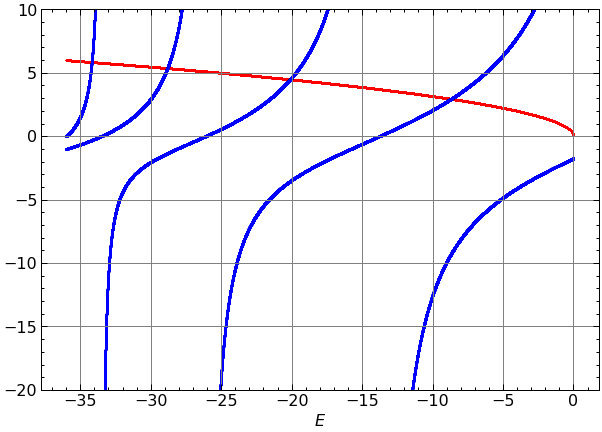

In [26]:
plt.figure(figsize=(10,7))
plt.scatter(E,RHS,s=0.1,color='red')
plt.scatter(E,LHS1,s=0.31,color='blue')
plt.scatter(E,LHS2, s=0.31,color='blue')
plt.ylim(-20,10)
plt.xlabel('$E$')
plt.grid(color='grey')
plt.show()

There are 4 bounds state for this particular $V_0$

In [59]:
#Let's finding the roots of that numericaly
def f1(E,V0):
    return np.sqrt(E+V0)*np.tan(np.sqrt(E+V0))-np.sqrt(-E)
def f2(E,V0):
    return np.sqrt(E+V0)/np.tan(np.sqrt(E+V0+1e-9)) +np.sqrt(-E)
f1s=f1(E,V0)
f2s=f2(E,V0)

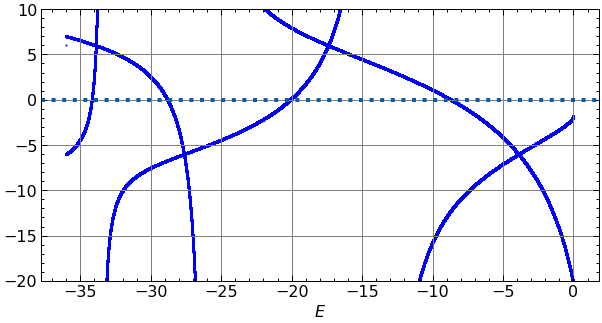

In [60]:
plt.figure(figsize=(10,5))
plt.scatter(E,f1(E,V0),s=1,color='b')
plt.scatter(E,f2(E,V0),s=1,color='b')
plt.ylim(-20,10)
plt.xlabel('$E$')
plt.grid(color='grey')
plt.axhline(0,ls=':',lw=4)
plt.show()

In [62]:
(np.abs(f1s)<3).astype(float)*np.diff(np.sign(f1s)) #lenght is different so

ValueError: operands could not be broadcast together with shapes (1000000,) (999999,) 

In [63]:
(np.abs(f1s)<3).astype(float)[:-1]*np.diff(np.sign(f1s)) #lenght is different so

array([0., 0., 0., ..., 0., 0., 0.])

In [67]:
#where are the non zero element aka the roots
np.where((np.abs(f1s)<3)[:-1].astype(float)*np.diff(np.sign(f1s)))[0] #bc it returns a tuple

array([ 50232, 441299])

In [68]:
#Voilà
#Average energy around the crossings
zero_crossings=np.where((np.abs(f1s)<3)[:-1].astype(float)*np.diff(np.sign(f1s)))[0]
(E[zero_crossings]+ E[zero_crossings+1])/2


array([-34.19162819, -20.11320211])

In [75]:
#Putting all together
zero_crossings_even=np.where((np.abs(f1s)<3)[:-1].astype(float)*np.diff(np.sign(f1s)))[0]
zero_crossings_odd=np.where((np.abs(f2s)<3)[:-1].astype(float)*np.diff(np.sign(f2s)))[0]
zero_crossings=np.sort(np.concatenate([zero_crossings_even,zero_crossings_odd]))
Es_met1=(E[zero_crossings]+E[zero_crossings])/2
Es_met1

array([-34.19164619, -28.82414882, -20.11322011,  -8.68932869])

# Now let's do it numerically


The equation (primes ' not shown):

<span style="color: red;">
$$\boxed{\left(-\frac{d^2}{dx^2} + V(x) \right)\psi(x) = E \psi(x)}$$
</span>
    
is an example of a eigenvalue problem over a continuous domain. By discretizing $x$ ($N$ equally spaced values $x$), we can turn this <span style="color: purple;">differential operator</span> eigenvalue problem into a <span style="color: purple;">matrix equation</span> eigenvalue problem over an $N$ dimensional vector space. If $x$ is made discrete then it can only take on values $x_i$ with spacing $\Delta x$. The corresponding values a function takes at these $x_i$ values is defined as $f_i\equiv f(x_i)$. In our case, we have $x_i$ values and $\psi_i$ values. Using the fact that

<br /><br />

$$\frac{d^2 \psi}{dx^2}(x_i) \approx \frac{-2\psi_i + \psi_{i-1}+\psi_{i+1}}{\Delta x^2}$$

we can rewrite the Schrodinger equation as

<span style="color: red;">
$$\frac{2\psi_i - \psi_{i-1}-\psi_{i+1}}{\Delta x^2} + V_i \psi_i  = E \psi_i$$
</span>
    
Assuming the wave function decays sufficiently fast outside the well (will be discussed shortly), we can assume that <span style="color: red;">$\psi_0=\psi_N=0$</span> are the boundary condtions.

Since this holds for all $\psi_i$, it can be expressed as a matrix eigenvalue equation (note, the top left and bottom right corners are okay since $\psi_0=0$ and $\psi_{N-1}=0$). Our Schrodinger equation $H\psi=E\psi$ then becomes the equation below. Note that the Hamiltonian is now a matrix.

<span style="color: red;">
$$ \begin{bmatrix}\frac{2}{\Delta x^2}+V_1 & -\frac{1}{\Delta x^2} &   0 & 0...\\ -\frac{1}{\Delta x^2} & \frac{2}{\Delta x^2}+V_2 & -\frac{1}{\Delta x^2} & 0... \\ ...& ... & ... & -\frac{1}{ \Delta x^2}\\...0 & 0 & -\frac{1}{\Delta x^2} & \frac{2}{\Delta x^2}+V_{N-1} \\ \end{bmatrix} \begin{bmatrix} \psi_1 \\ \psi_2 \\ ... \\ \psi_{N-1} \end{bmatrix} = E \begin{bmatrix} \psi_1 \\ \psi_2 \\ ... \\ \psi_{N-1} \end{bmatrix} $$
</span>

In [98]:
N=100000
x=np.linspace(-3,3,N)
dx=np.diff(x)[0]
dx

6.0000600006215876e-05

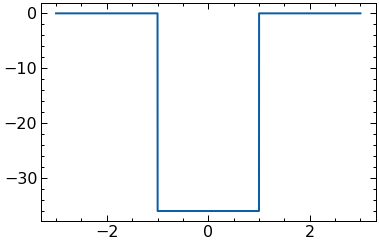

In [99]:
plt.plot(x,-V0*((x>=-1)*(x<=1)).astype(float))
plt.show()

In [100]:
main_diag=2*np.ones(N)/dx**2 - V0*((x>=-1)*(x<=1)).astype(float) #fast way to create a well
off_diags=-np.ones(N-1)/dx**2
#The last 2 prs specify that we want only the bounded energies
Es_met2,psis= eigh_tridiagonal(main_diag,off_diags, select='v',select_range=(-V0,0))

0.007111846763119682

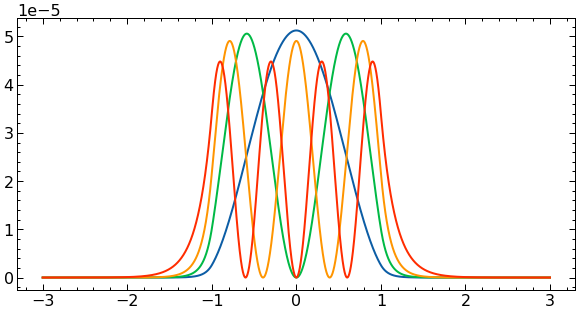

In [104]:
plt.figure(figsize=(10,5))
plt.plot(x,np.abs(psis.T[0])**2)
plt.plot(x,psis.T[1]**2)
plt.plot(x,psis.T[2]**2)
plt.plot(x,psis.T[3]**2)
np.max(psis.T[1])

In [102]:
np.max?